# Model1 - Implement and train a base model



## Load modules

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

import helpers

## Load dataset

In [48]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

## Build Model

In [49]:
def evaluate_model(model, history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='val')

    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.show()

    # evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Model Loss:', test_loss)
    print('Model Accuracy:', test_acc)

    # make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    conf_mat = confusion_matrix(y_test_labels, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [50]:
input_shape = x_test.shape[1:]

model = Sequential()

model.add(Input(shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

print(model.summary())



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

In [51]:
# compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(
    x_train, y_train, 
    batch_size=512, 
    epochs=15, 
    validation_split=0.1
)


2024-09-25 21:05:21.646370: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.
2024-09-25 21:05:22.202087: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


Epoch 1/15
88/88 [==============================] - 4s 29ms/step - loss: 2.2907 - accuracy: 0.1481 - val_loss: 2.2741 - val_accuracy: 0.1812
Epoch 2/15
88/88 [==============================] - 1s 16ms/step - loss: 2.2579 - accuracy: 0.1874 - val_loss: 2.2390 - val_accuracy: 0.2014
Epoch 3/15
88/88 [==============================] - 1s 16ms/step - loss: 2.2128 - accuracy: 0.2072 - val_loss: 2.1850 - val_accuracy: 0.2224
Epoch 4/15
88/88 [==============================] - 1s 17ms/step - loss: 2.1512 - accuracy: 0.2352 - val_loss: 2.1207 - val_accuracy: 0.2510
Epoch 5/15
88/88 [==============================] - 1s 17ms/step - loss: 2.0827 - accuracy: 0.2650 - val_loss: 2.0570 - val_accuracy: 0.2768
Epoch 6/15
88/88 [==============================] - 1s 16ms/step - loss: 2.0200 - accuracy: 0.2846 - val_loss: 1.9972 - val_accuracy: 0.2944
Epoch 7/15
88/88 [==============================] - 1s 16ms/step - loss: 1.9718 - accuracy: 0.2998 - val_loss: 1.9588 - val_accuracy: 0.3074
Epoch 8/15
88

313/313 [==============================] - 1s 3ms/step - loss: 1.7514 - accuracy: 0.3846
Model Loss: 1.7513856887817383
Model Accuracy: 0.3846000134944916


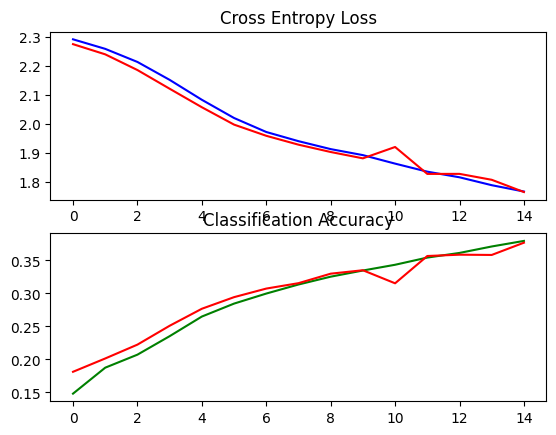

313/313 [==============================] - 1s 2ms/step


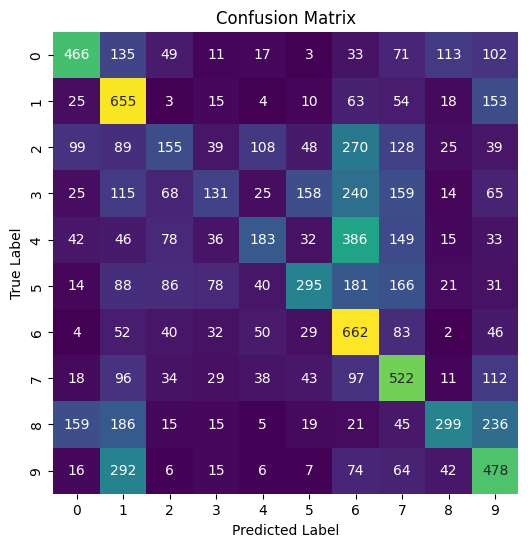

In [53]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

### Model 1: Conclusion
The confusion matrix shows a poor distribution around the main diagonal and the accuracy is barely above 50%, clearly showing that our base model is not complex enough to capture the similarities of the different classes.

In [54]:
from keras.backend import clear_session
clear_session()